### Regression

## Air Quality prediction model using a Machine Learning Algorithm

### Problem Statement:
- To check the quality of air using ‘Air Quality Chemical Multisensor Device’ by finding the R^2 score and coefficient of regression using different regression models and the best model is selected to evaluate the Air Quality.

### Dataset Collection
- Collected data from: https://archive.ics.uci.edu/ml/machine-learning-databases/00360

### About Dataset
- The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device

## Features Information:
1. Date - DD/MM/YY
2. Time - HH.MM.SS
3. CO(GT) - True hourly averaged concentration CO in mg/m^3
4. PT08.S1(CO) - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
5. NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3	
6. C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3
7. PT08.S2(NMHC) - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. NOx(GT) - True hourly averaged NOx concentration in ppb
9. PT08.S3(NOx) - PT08.S3 (tungsten oxide) hourly averaged sensor response
10. NO2(GT) - True hourly averaged NO2 concentration in microg/m^3

11. PT08.S4(NO2)- PT08.S4 (tungsten oxide) hourly averaged sensor response
12. PT08.S5(O3) - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. T - Temperature in Â°C 14.RH - Relative Humidity (%) 15.AH - Absolute Humidity 

### Evaluation Metrics:
#### R^2 Score:
- R-squared is a statistical measure that’s used to assess the goodness of fit of our regression model. In R-squared we have a baseline model

## DATA VALIDATION

In [1]:
# importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data Extraction
# Reading the dataset

data=pd.read_excel("C:/Users/lenovo/Desktop/summer internship/AirQualityUCI.xlsx")
# prints the first 10 rows of dataframe
data.head(10) 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [3]:
# find the shape of Dataframe
data.shape

(9357, 15)

In [4]:
# Reading  columns name
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [47]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [6]:
# Looking at the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
# deleting unnecessary columns

data_df= data.drop(['Date','Time','PT08.S4(NO2)'],axis=1)
data_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1110.00,11.15,59.575001,0.788794


## Performing Exploratory Analysis

In [8]:
#Finding missing values
data_df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
# check the duplicate value

data_df.duplicated().sum()

31

In [10]:
# removing the duplicate value
data_df.duplicated().sum()
data_df.drop_duplicates(inplace=True)
data_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1110.00,11.15,59.575001,0.788794


In [11]:
# info() function is used to get consice summary of the dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9326 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9326 non-null   float64
 1   PT08.S1(CO)    9326 non-null   float64
 2   NMHC(GT)       9326 non-null   int64  
 3   C6H6(GT)       9326 non-null   float64
 4   PT08.S2(NMHC)  9326 non-null   float64
 5   NOx(GT)        9326 non-null   float64
 6   PT08.S3(NOx)   9326 non-null   float64
 7   NO2(GT)        9326 non-null   float64
 8   PT08.S5(O3)    9326 non-null   float64
 9   T              9326 non-null   float64
 10  RH             9326 non-null   float64
 11  AH             9326 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 947.2 KB


In [12]:
# Reading columns name
data_df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [13]:
# Changing the column names
data_df=data_df.rename(columns={'CO(GT)':'CO_GT','PT08.S1(CO)':'CO',
                          'NMHC(GT)':'NMHC_GT','PT08.S2(NMHC)':'NHMC',     
                         'C6H6(GT)':'C6H6_GT','NOx(GT)':'NOX_GT','PT08.S3(NOx)':'NOX',
                         'NO2(GT)':'NO2_GT','PT08.S5(O3)':'O3'})
data_df.columns

Index(['CO_GT', 'CO', 'NMHC_GT', 'C6H6_GT', 'NHMC', 'NOX_GT', 'NOX', 'NO2_GT',
       'O3', 'T', 'RH', 'AH'],
      dtype='object')

In [48]:
data_df.describe()

,CO_GT,CO,NMHC_GT,C6H6_GT,NHMC,NOX_GT,NOX,NO2_GT,O3,T,RH,AH
count,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000,9326.000000
mean,-33.677954,1053.020945,-158.954107,2.536585,898.114045,169.829455,798.179328,58.993952,978.857120,10.473905,40.279664,-6.195524
std,77.212965,322.395213,140.001322,39.775508,337.007823,256.971827,317.352355,126.265174,452.623264,41.544695,49.401077,37.413633
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,922.500000,-200.000000,4.041180,713.000000,51.000000,638.812500,53.850000,702.250000,11.000000,34.225000,0.695943
50%,1.500000,1053.250000,-200.000000,7.919863,895.875000,142.000000,795.000000,96.300000,943.500000,17.275000,48.625000,0.979225
75%,2.600000,1221.937500,-200.000000,13.658956,1105.500000,284.975000,961.000000,133.000000,1256.500000,24.100000,61.925000,1.298629
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2522.750000,44.600000,88.725000,2.231036


## Visualization of data with missing value

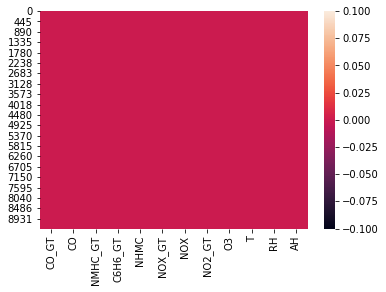

In [14]:
# check the missing value 
sns.heatmap(data_df.isnull())

In [15]:
# checking the correlation
data_df.corr()

,CO_GT,CO,NMHC_GT,C6H6_GT,NHMC,NOX_GT,NOX,NO2_GT,O3,T,RH,AH
CO_GT,1.000000,0.016094,0.127311,-0.067868,0.008337,0.522303,-0.113697,0.666748,0.063951,-0.107108,-0.083820,-0.083776
CO,0.016094,1.000000,0.170461,0.844921,0.930879,0.267344,0.050023,0.132548,0.891176,0.740441,0.730502,0.751165
NMHC_GT,0.127311,0.170461,1.000000,0.033958,0.108868,-0.005827,0.046578,0.102085,0.099805,-0.004929,0.003883,0.008014
C6H6_GT,-0.067868,0.844921,0.033958,1.000000,0.758655,-0.025498,0.489311,-0.046120,0.631812,0.968924,0.918992,0.983218
NHMC,0.008337,0.930879,0.108868,0.758655,1.000000,0.322725,-0.110213,0.158750,0.908003,0.654305,0.566395,0.630502
NOX_GT,0.522303,0.267344,-0.005827,-0.025498,0.322725,1.000000,-0.459689,0.815851,0.456258,-0.168877,-0.078429,-0.125054
NOX,-0.113697,0.050023,0.046578,0.489311,-0.110213,-0.459689,1.000000,-0.283569,-0.241848,0.569716,0.554560,0.605180
NO2_GT,0.666748,0.132548,0.102085,-0.046120,0.158750,0.815851,-0.283569,1.000000,0.240381,-0.122627,-0.118069,-0.098696
O3,0.063951,0.891176,0.099805,0.631812,0.908003,0.456258,-0.241848,0.240381,1.000000,0.486782,0.509225,0.503386
T,-0.107108,0.740441,-0.004929,0.968924,0.654305,-0.168877,0.569716,-0.122627,0.486782,1.000000,0.876650,0.979365


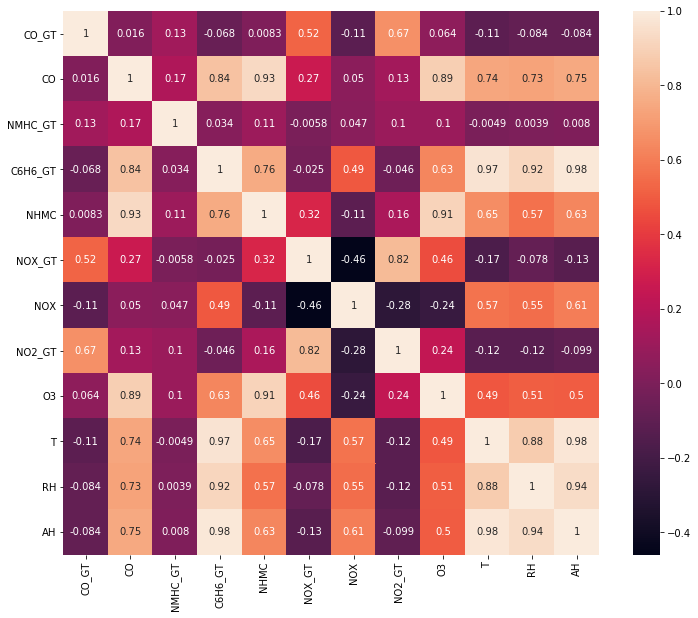

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(data_df.corr(),annot= True)

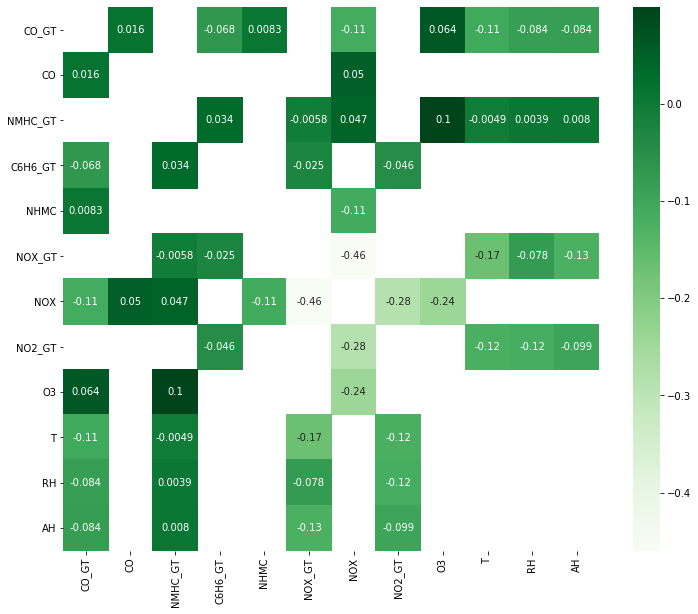

In [50]:
## Correlation> 0.7
correlation = data_df.corr()

cor = correlation[(correlation<0.1)]
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap='Greens', annot=True)

## Data take for split in train data and test data

In [41]:
# first take input and output data
# we droped 'C6H6(GT)'  column as Target

X = data_df.drop(['C6H6_GT'],axis=1).values 

y = data_df['C6H6_GT'].values  # output

In [42]:
# Train and Test portions

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Apply Linear Regression for build model

In [43]:
from sklearn.linear_model import LinearRegression
# create one object
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# apply  predict method on X_train
y_train_pred=lr.predict(X_train)
y_train_pred

array([ 5.78482023,  9.3033614 , 14.75559945, ..., 11.69648534,
       15.55878955,  6.98846135])

### Evaluation Metrics:

In [45]:
# Apply the r2_score:

from sklearn.metrics import r2_score
print('R^2:',r2_score(y_train,y_train_pred))

R^2: 0.9991616551795145


In [46]:
# check the error betwenn our Actual value and the predicted value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('MAE:', mean_absolute_error(y_train, y_train_pred))

print('MSE:', mean_squared_error(y_train, y_train_pred))

print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)))

MAE: 0.8169708142042523
MSE: 1.3501063411370673
RMSE 1.1619407649002884


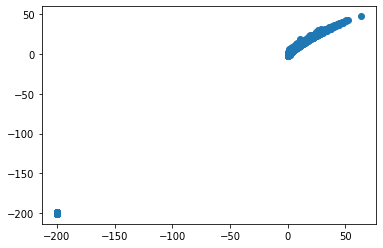

In [23]:
# apply scatter plot for Actual train data and predict train data
plt.scatter(y_train,y_train_pred)

In [24]:
# apply  predict method on X_test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([   1.98008703, -200.37583643,   28.63254698, ...,    9.17285858,
          7.19852841,    0.62906506])

In [25]:
# Apply the r2_score:

from sklearn.metrics import r2_score
print('R^2:',r2_score(y_test,y_test_pred))

R^2: 0.9990681790978626


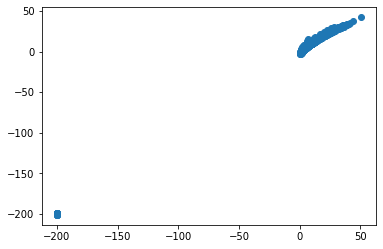

In [26]:
plt.scatter(y_test,y_test_pred)

In [27]:
# check the error betwenn our Actual value and the predicted value
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('MAE:', mean_absolute_error(y_test, y_test_pred))

print('MSE:', mean_squared_error(y_test, y_test_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

MAE: 0.8224209102175281
MSE: 1.291457363351577
RMSE 1.1364230565029807


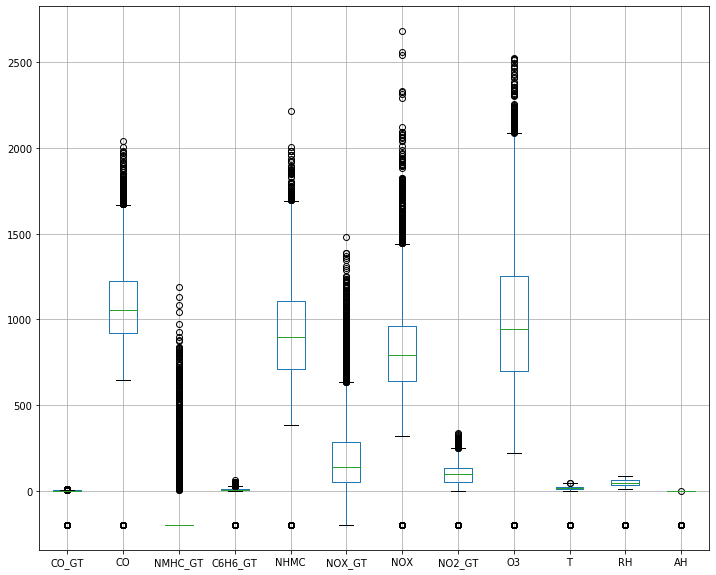

In [31]:
plt.figure(figsize=(12,10))
data_df.boxplot()